In [1]:
import numpy as np 
import pandas as pd
import matplotlib as plt

__Создание искусственного датасета на основе данных [Tinkoff](https://vc.ru/tinkoff_invest/257662-molodye-i-derzkie-tinkoff-investicii-sostavili-portret-novogo-millionera)__

__Шаг 1. Заводим искусственных юзеров__

In [2]:
id_list = np.arange(1, 100001, 1)

In [3]:
id_list

array([     1,      2,      3, ...,  99998,  99999, 100000])

In [4]:
# 100 000 юзеров - вполне достаточно. 
# Строчка ниже - распределение по гендерному признаку.

In [5]:
men_per = 0.866
women_per = 0.134

In [6]:
shape = len(id_list)

In [7]:
shape

100000

In [8]:
percentile = [men_per, women_per]

__SEX__

In [9]:
sex_value = [1, 0]

In [10]:
data = dict()

In [11]:
for i in range(len(id_list)): 
    data[id_list[i]] = np.random.choice(sex_value, p=percentile)

In [12]:
ser = pd.Series(data)

In [13]:
ser

1         1
2         1
3         1
4         1
5         1
         ..
99996     1
99997     1
99998     1
99999     1
100000    1
Length: 100000, dtype: int64

__HEIGHT__

In [14]:
# распределение по возрастному признаку. 

In [15]:
general_height = ['18-28', '28-38', '38-48', '48+']

In [16]:
height_percent = [0.037, 0.365, 0.389, 0.209]

In [17]:
for i in range(len(id_list)): 
    data[id_list[i]] = np.random.choice(general_height, p=height_percent)

In [18]:
ser2 = pd.Series(data)

In [19]:
df = pd.DataFrame({'sex': ser, 'height': ser2})

In [20]:
df.head()

,sex,height
1,1,28-38
2,1,38-48
3,1,38-48
4,1,48+
5,1,28-38


In [21]:
df.sex.value_counts()

1    86643
0    13357
Name: sex, dtype: int64

In [22]:
df.height.value_counts()

38-48    38932
28-38    36592
48+      20729
18-28     3747
Name: height, dtype: int64

In [23]:
#Комментарий: ну что же, реверс-инжиниринг данных хорошо идет, двигаемся дальше...

__Marital status__

In [24]:
status = ['married', 'not_married']

In [25]:
status_percent = [0.55, 0.45]

In [26]:
# для простоты работы создадим функцию, которая будет принимать список из вероятностей признака (prob_feature) и 
# сам признак (feature_list), а также id_list.

# Оставим поэтапную обработку добора фичей, чтобы вслучае каких-либо обстоятельств мы могли добавить или удалить признак.

In [31]:
def get_series(feature_list, prob_feature, id_feature_list): 
    
    """"
    
    feture_list -> (List) - Данные признака, который хотим восстановить
    prob_feature -> (List) - Вероятность этого признака
    id_feature_list -> (List) - id_list синтетических юзеров
    
    """
    
    data = dict()
    for i in range(len(id_feature_list)): 
        data[id_feature_list[i]] = np.random.choice(feature_list, p=prob_feature)
    ser_feature = pd.Series(data)
    
    return ser_feature

In [32]:
mar_status = get_series(status, status_percent, id_list)

In [33]:
df['marital_status'] = mar_status

In [34]:
df.head()

,sex,height,marital_status
1,1,28-38,married
2,1,38-48,not_married
3,1,38-48,married
4,1,48+,not_married
5,1,28-38,married


In [35]:
#как всегда проверяем сами себя: 
df.marital_status.value_counts()

married        54827
not_married    45173
Name: marital_status, dtype: int64

__Education__

In [36]:
education = ['high_education', 'medium_education', 'second_high_education', 'academic_credential']
education_percent = [0.8, 0.06, 0.11, 0.03]

In [37]:
education_status = get_series(education, education_percent, id_list)

In [38]:
df['education_status'] = education_status

In [39]:
df.head()

,sex,height,marital_status,education_status
1,1,28-38,married,high_education
2,1,38-48,not_married,high_education
3,1,38-48,married,high_education
4,1,48+,not_married,high_education
5,1,28-38,married,high_education


In [40]:
df.education_status.value_counts()

high_education           79731
second_high_education    11212
medium_education          6031
academic_credential       3026
Name: education_status, dtype: int64

__Children__

In [41]:
child = ['children', 'no_children']

In [42]:
children_percent = [0.5, 0.5]

In [43]:
children_status = get_series(child, children_percent, id_list)

In [44]:
df['children_status'] = children_status

In [45]:
df.head()

,sex,height,marital_status,education_status,children_status
1,1,28-38,married,high_education,children
2,1,38-48,not_married,high_education,children
3,1,38-48,married,high_education,no_children
4,1,48+,not_married,high_education,children
5,1,28-38,married,high_education,no_children


In [46]:
df.children_status.value_counts()

children       50058
no_children    49942
Name: children_status, dtype: int64

__Risk profile__ 

In [47]:
# Уровень риска, который указывает инвестор в анкете. 

In [48]:
risk_profile = ['high_risk', 'medium_risk', 'low_risk']

In [49]:
risk_percent = [0.6, 0.36, 0.04]

In [50]:
risk_status = get_series(risk_profile, risk_percent, id_list)

In [51]:
df['risk_status'] = risk_status

In [52]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status
1,1,28-38,married,high_education,children,medium_risk
2,1,38-48,not_married,high_education,children,high_risk
3,1,38-48,married,high_education,no_children,high_risk
4,1,48+,not_married,high_education,children,high_risk
5,1,28-38,married,high_education,no_children,medium_risk


In [53]:
df.risk_status.value_counts()

high_risk      60122
medium_risk    35984
low_risk        3894
Name: risk_status, dtype: int64

__Location__

In [54]:
#Город, в котором проживает инвестор

In [55]:
city = ['Moscow', 'Sain-Petersburg', 'Krasnodar', 'Moscow_region', 'Tatarstan',
        'Rostov','Samara', 'Ekaterinburg', 'Volgograd', 'Novosibirsk']

In [56]:
citizens = np.array([12678, 5398, 933, 7708, 1129, 1138, 1157, 1494, 1009, 1626])

In [57]:
citizens_sum = citizens.sum()

In [58]:
city_percent = [round(citizens[i]/citizens_sum, 3) for i in range(len(city))] 

In [59]:
city_percent

[0.37, 0.158, 0.027, 0.225, 0.033, 0.033, 0.034, 0.044, 0.029, 0.047]

In [60]:
city_percent=np.array([city_percent])

In [61]:
assert city_percent.sum()==1.

In [62]:
city_percent.sum()

1.0

In [63]:
location_status = get_series(city, city_percent.flatten(), id_list)

In [64]:
df['location_status'] = location_status

In [65]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status
1,1,28-38,married,high_education,children,medium_risk,Moscow
2,1,38-48,not_married,high_education,children,high_risk,Sain-Petersburg
3,1,38-48,married,high_education,no_children,high_risk,Moscow
4,1,48+,not_married,high_education,children,high_risk,Novosibirsk
5,1,28-38,married,high_education,no_children,medium_risk,Sain-Petersburg


In [66]:
df.location_status.value_counts()

Moscow             37081
Moscow_region      22364
Sain-Petersburg    15604
Novosibirsk         4724
Ekaterinburg        4539
Samara              3439
Tatarstan           3383
Rostov              3270
Volgograd           2828
Krasnodar           2768
Name: location_status, dtype: int64

__Activity__

In [67]:
# Занятость

In [68]:
activity = ['retirement', 'not_working', 'employee', 'own_business', 'senior_officer']

In [69]:
activity_percent = [0.02, 0.11, 0.2, 0.31, 0.36]

In [70]:
activity_status = get_series(activity, activity_percent, id_list)

In [71]:
df['activity_status'] = activity_status 

In [72]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status,activity_status
1,1,28-38,married,high_education,children,medium_risk,Moscow,senior_officer
2,1,38-48,not_married,high_education,children,high_risk,Sain-Petersburg,senior_officer
3,1,38-48,married,high_education,no_children,high_risk,Moscow,own_business
4,1,48+,not_married,high_education,children,high_risk,Novosibirsk,senior_officer
5,1,28-38,married,high_education,no_children,medium_risk,Sain-Petersburg,own_business


In [73]:
df.activity_status.value_counts()

senior_officer    36118
own_business      31016
employee          19916
not_working       10991
retirement         1959
Name: activity_status, dtype: int64

__Deposit amount__

In [74]:
# Размер средств на счете

In [75]:
deposit_mln = ['1-5', '5-10', '10-20']

In [76]:
depo_perc = [0.6, 0.2, 0.2]

In [77]:
depo_status = get_series(deposit_mln, depo_perc, id_list)

In [78]:
df['depo_status'] = depo_status 

In [79]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status,activity_status,depo_status
1,1,28-38,married,high_education,children,medium_risk,Moscow,senior_officer,1-5
2,1,38-48,not_married,high_education,children,high_risk,Sain-Petersburg,senior_officer,5-10
3,1,38-48,married,high_education,no_children,high_risk,Moscow,own_business,5-10
4,1,48+,not_married,high_education,children,high_risk,Novosibirsk,senior_officer,5-10
5,1,28-38,married,high_education,no_children,medium_risk,Sain-Petersburg,own_business,1-5


In [80]:
df.depo_status.value_counts()

1-5      59959
10-20    20193
5-10     19848
Name: depo_status, dtype: int64

In [81]:
# Датасет готов. Его можно будет дополнять, это mvp от которого будем отталкиваться. Сохраним его в csv.

In [82]:
file_name = 'users_initial.csv'

In [86]:
df.to_csv(file_name, encoding='utf-8', index=False)

__Short EDA__ 

In [88]:
df = pd.read_csv('users_initial.csv')

In [89]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status,activity_status,depo_status
0,1,28-38,married,high_education,children,medium_risk,Moscow,senior_officer,1-5
1,1,38-48,not_married,high_education,children,high_risk,Sain-Petersburg,senior_officer,5-10
2,1,38-48,married,high_education,no_children,high_risk,Moscow,own_business,5-10
3,1,48+,not_married,high_education,children,high_risk,Novosibirsk,senior_officer,5-10
4,1,28-38,married,high_education,no_children,medium_risk,Sain-Petersburg,own_business,1-5


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sex               100000 non-null  int64 
 1   height            100000 non-null  object
 2   marital_status    100000 non-null  object
 3   education_status  100000 non-null  object
 4   children_status   100000 non-null  object
 5   risk_status       100000 non-null  object
 6   location_status   100000 non-null  object
 7   activity_status   100000 non-null  object
 8   depo_status       100000 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.9+ MB


In [91]:
# Сначала визуализируем, затем обработаем наши данные.

__SEX__

<AxesSubplot:>

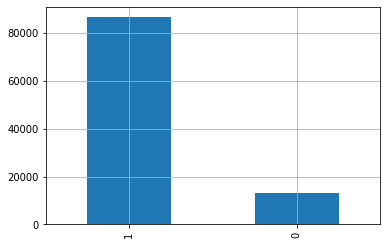

In [92]:
df.sex.value_counts().plot(kind='bar', grid = True)

__HEIGHT__

<AxesSubplot:>

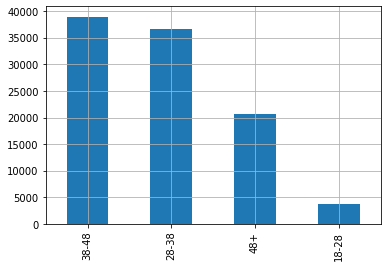

In [93]:
df.height.value_counts().plot(kind='bar', grid = True)

__MARITAL STATUS__

<AxesSubplot:>

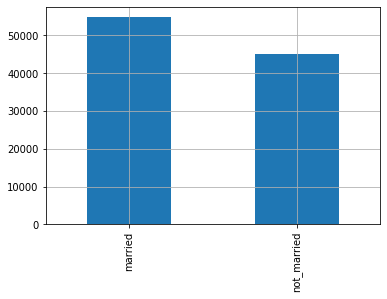

In [94]:
df.marital_status.value_counts().plot(kind='bar', grid = True)

__EDUCATION STATUS__

<AxesSubplot:>

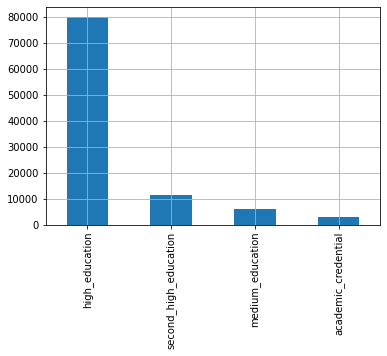

In [95]:
df.education_status.value_counts().plot(kind='bar', grid = True)

__CHILDREN STATUS___

<AxesSubplot:>

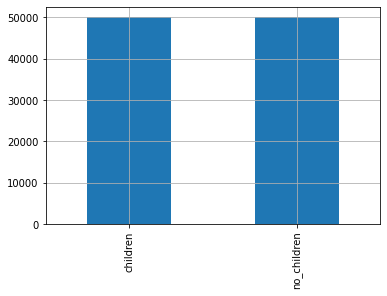

In [96]:
df.children_status.value_counts().plot(kind='bar', grid = True)

__RISK STATUS__

<AxesSubplot:>

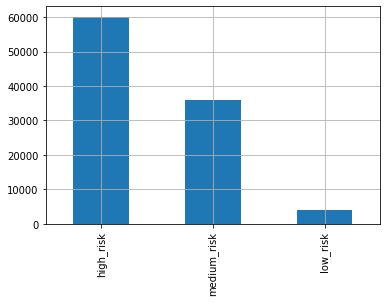

In [97]:
df.risk_status.value_counts().plot(kind='bar', grid = True)

__LOCATION STATUS__

<AxesSubplot:>

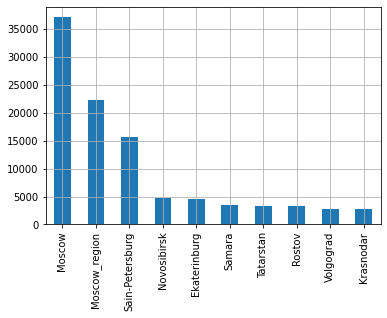

In [98]:
df.location_status.value_counts().plot(kind='bar', grid = True)

__ACTIVITY STATUS__

<AxesSubplot:>

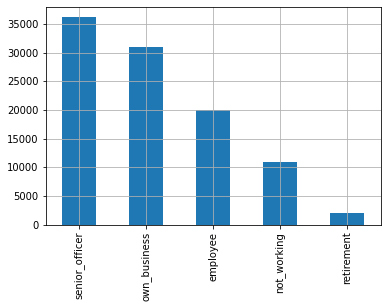

In [99]:
df.activity_status.value_counts().plot(kind='bar', grid = True)

__DEPO STATUS__

<AxesSubplot:>

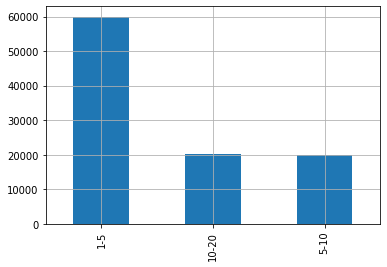

In [100]:
df.depo_status.value_counts().plot(kind='bar', grid = True)

__INITIAL DATASET TREATMENT__

In [101]:
height_dict = {'18-28': 23,
               '28-38': 43,
               '38-48': 53,
               '48+': 60}

activity_dict = {'own_business': 5, 'senior_officer': 4, 'not_working': 3, 'employee': 2,
                 'retirement': 1}

depo_dict = {'1-5': 2.5,
             '5-10': 7.5,
             '10-20': 15}

city_dict = {'Moscow': 1,
             'Sain-Petersburg': 2,
             'Krasnodar': 3,
             'Moscow_region': 4,
             'Tatarstan': 5,
             'Rostov': 6,
             'Samara': 7,
             'Ekaterinburg': 8,
             'Volgograd': 9,
             'Novosibirsk': 10}

risk_profile_dict = {'high_risk': 1,
                     'medium_risk': 2,
                     'low_risk': 3}

child_dict = {'children': 1,
              'no_children': 0}

education_dict = {'high_education': 1,
                  'medium_education': 2,
                  'second_high_education': 3,
                  'academic_credential':4}

status_dict = {'married': 1,
               'not_married': 0}

In [102]:
df['height_ord'] = df.height.map(height_dict)
df['marital_status_ord'] = df.marital_status.map(status_dict)
df['education_status_ord'] = df.education_status.map(education_dict)
df['children_status_ord'] = df.children_status.map(child_dict)
df['risk_status_ord'] = df.risk_status.map(risk_profile_dict)
df['location_status_ord'] = df.location_status.map(city_dict)
df['activity_status_ord'] = df.activity_status.map(activity_dict)
df['depo_status_ord'] = df.depo_status.map(depo_dict)

In [103]:
# со временем это все можно обернуть в функцию и автоматизировать мэппинг через цикл. 

In [104]:
df.head()

,sex,height,marital_status,education_status,children_status,risk_status,location_status,activity_status,depo_status,height_ord,marital_status_ord,education_status_ord,children_status_ord,risk_status_ord,location_status_ord,activity_status_ord,depo_status_ord
0,1,28-38,married,high_education,children,medium_risk,Moscow,senior_officer,1-5,43,1,1,1,2,1,4,2.5
1,1,38-48,not_married,high_education,children,high_risk,Sain-Petersburg,senior_officer,5-10,53,0,1,1,1,2,4,7.5
2,1,38-48,married,high_education,no_children,high_risk,Moscow,own_business,5-10,53,1,1,0,1,1,5,7.5
3,1,48+,not_married,high_education,children,high_risk,Novosibirsk,senior_officer,5-10,60,0,1,1,1,10,4,7.5
4,1,28-38,married,high_education,no_children,medium_risk,Sain-Petersburg,own_business,1-5,43,1,1,0,2,2,5,2.5


In [105]:
df_treated = df[['sex', 'height_ord', 'marital_status_ord',
                 'education_status_ord', 'children_status_ord', 'risk_status_ord',
                 'location_status_ord', 'depo_status_ord', 'activity_status_ord']]

In [106]:
df_treated.head()

,sex,height_ord,marital_status_ord,education_status_ord,children_status_ord,risk_status_ord,location_status_ord,depo_status_ord,activity_status_ord
0,1,43,1,1,1,2,1,2.5,4
1,1,53,0,1,1,1,2,7.5,4
2,1,53,1,1,0,1,1,7.5,5
3,1,60,0,1,1,1,10,7.5,4
4,1,43,1,1,0,2,2,2.5,5


In [107]:
#сохраним обновленный датасет для дальнейшей работы с ним

In [108]:
file_name_tr = 'users_treated.csv'

In [109]:
df.to_csv(file_name_tr, encoding='utf-8', index=False)